In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = 'IMDb Movies India.csv'  
data = pd.read_csv(file_path, encoding='ISO-8859-1')

In [3]:
# Display the first few rows of the dataset
print("Dataset Head:")
print(data.head())


Dataset Head:
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant 

In [4]:
# Display basic information about the dataset
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [7]:
# Statistical summary of the dataset
print("\nStatistical Summary:")
print(data.describe(include='all'))


Statistical Summary:
          Name    Year Duration  Genre       Rating Votes      Director  \
count    15509   14981     7240  13632  7919.000000  7920         14984   
unique   13838     102      182    485          NaN  2034          5938   
top     Anjaam  (2019)  120 min  Drama          NaN     8  Jayant Desai   
freq         7     410      240   2780          NaN   227            58   
mean       NaN     NaN      NaN    NaN     5.841621   NaN           NaN   
std        NaN     NaN      NaN    NaN     1.381777   NaN           NaN   
min        NaN     NaN      NaN    NaN     1.100000   NaN           NaN   
25%        NaN     NaN      NaN    NaN     4.900000   NaN           NaN   
50%        NaN     NaN      NaN    NaN     6.000000   NaN           NaN   
75%        NaN     NaN      NaN    NaN     6.800000   NaN           NaN   
max        NaN     NaN      NaN    NaN    10.000000   NaN           NaN   

            Actor 1 Actor 2 Actor 3  
count         13892   13125   12365  
u

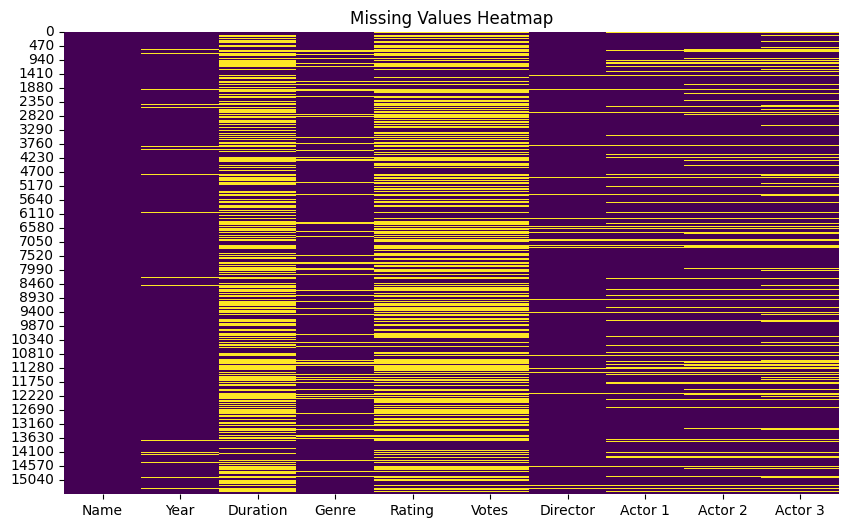

In [8]:
# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

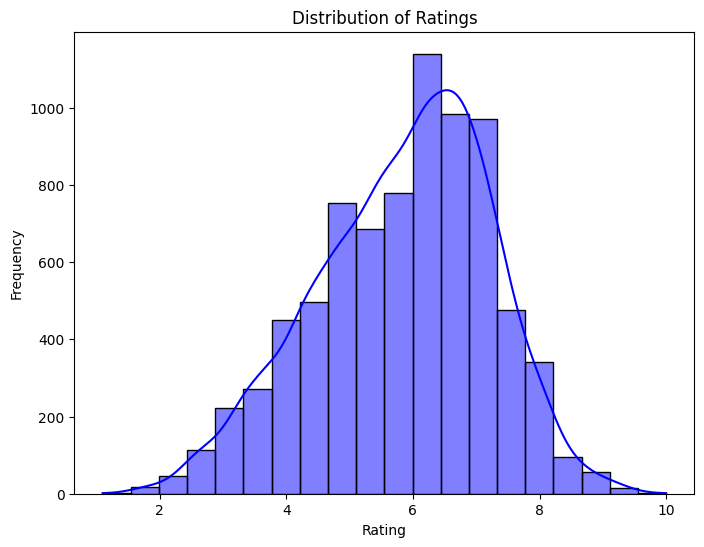

In [9]:
# Distribution of Ratings
plt.figure(figsize=(8, 6))
sns.histplot(data['Rating'].dropna(), bins=20, kde=True, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

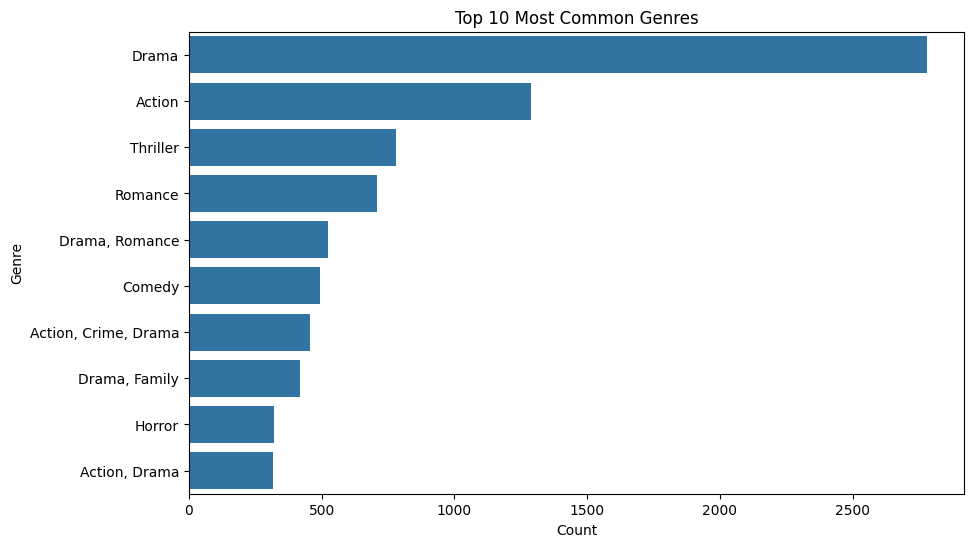

In [12]:
# Most Common Genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Top 10 Most Common Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


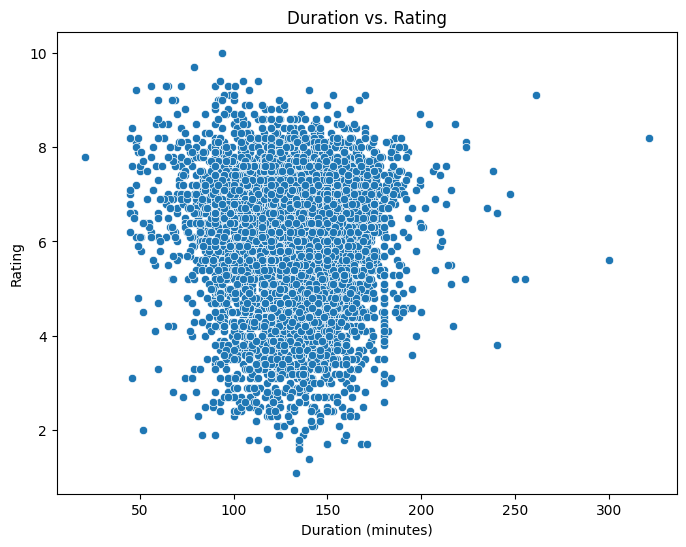

In [13]:
# Relationship between Duration and Rating
plt.figure(figsize=(8, 6))
data['Duration'] = data['Duration'].str.replace(' min', '').astype(float)  # Clean Duration column
sns.scatterplot(x='Duration', y='Rating', data=data)
plt.title('Duration vs. Rating')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.show()

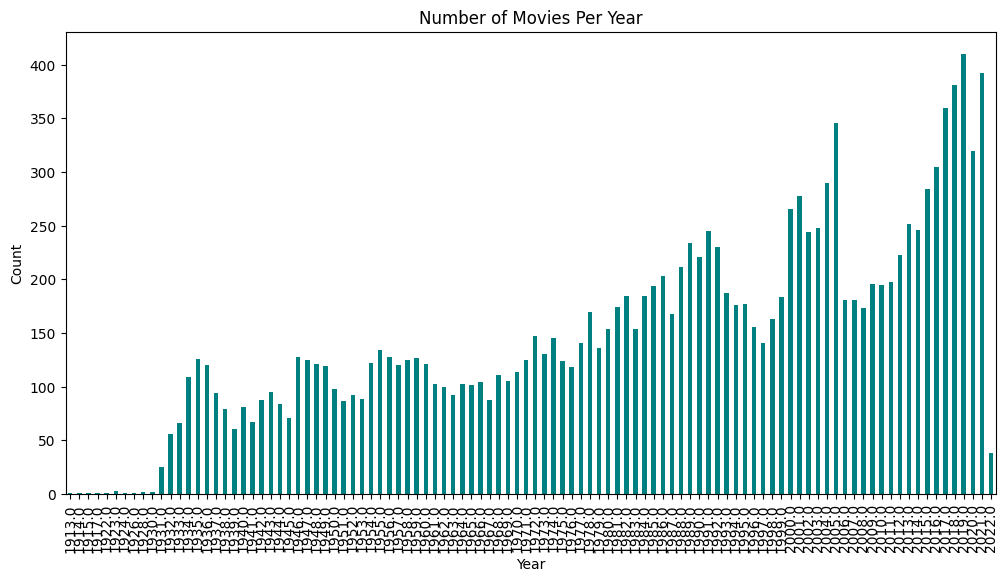

In [16]:
# Ensure the Year column is a string before extracting
data['Year'] = data['Year'].astype(str)  # Convert to string
data['Year'] = data['Year'].str.extract(r'(\d{4})')  # Extract year from parentheses

# Drop NaN values if needed
data['Year'] = data['Year'].dropna().astype(float)

# Count movies per year and plot
plt.figure(figsize=(12, 6))
year_counts = data['Year'].value_counts().sort_index()
year_counts.plot(kind='bar', color='teal')
plt.title('Number of Movies Per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

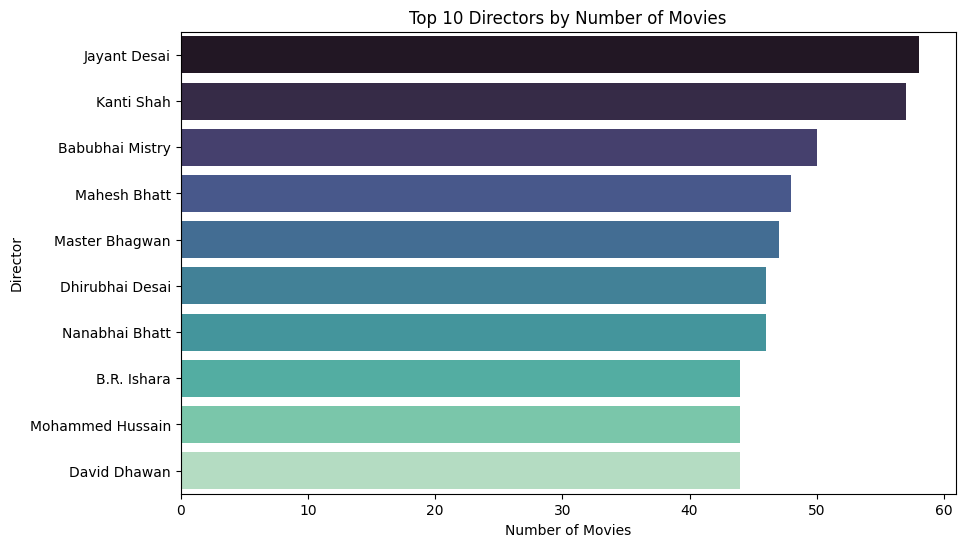

In [18]:
# Top Directors by Number of Movies
plt.figure(figsize=(10, 6))
director_counts = data['Director'].value_counts().head(10)
sns.barplot(x=director_counts.values, y=director_counts.index, palette='mako', hue=director_counts.index, dodge=False)
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.legend([], [], frameon=False)  # Remove redundant legend
plt.show()

Year         528
Duration    8269
Rating      7590
dtype: int64


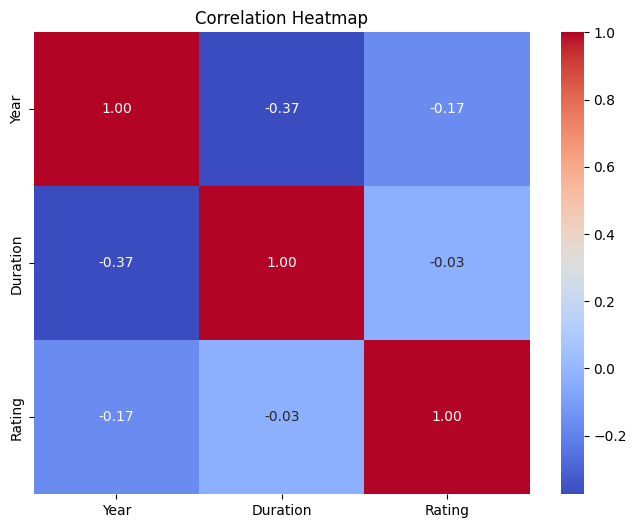

In [20]:
# Correlation Heatmap (Numeric Columns)
plt.figure(figsize=(8, 6))

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Check for invalid data
print(numeric_data.isnull().sum())  # Optional: Review missing values

# Compute the correlation matrix
correlation = numeric_data.corr()

# Plot the heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [21]:
print("EDA Completed.")

EDA Completed.
